Assignment 2

# Embedding

* Classification text – Code template provided 

* Data source:  BBC news 

# Setup Azure OpenAI

In [2]:
import os
import openai
from dotenv import load_dotenv

# Set up Azure OpenAI
load_dotenv()

# openai.api_type = "azure"
# openai.api_base = "" # Api base is the 'Endpoint' which can be found in Azure Portal where Azure OpenAI is created. It looks like https://xxxxxx.openai.azure.com/
# openai.api_version = "2023-07-01-preview"
# openai.api_key = "" # Or os.getenv("OPENAI_API_KEY") using local .env file. For more details, please see https://github.com/theskumar/python-dotenv

openai.api_type = "azure"
# openai.api_version = "2023-07-01-preview"
openai.api_version = "2023-09-15-preview"
API_KEY = os.getenv("OPENAI_API_KEY","").strip()
assert API_KEY, "ERROR: Azure OpenAI Key is missing"
openai.api_key = API_KEY
RESOURCE_ENDPOINT = os.getenv("OPENAI_API_ENDPOINT","").strip()
assert RESOURCE_ENDPOINT, "ERROR: Azure OpenAI Endpoint is missing"
assert "openai.azure.com" in RESOURCE_ENDPOINT.lower(), "ERROR: Azure OpenAI Endpoint should be in the form: \n\n\t<your unique endpoint identifier>.openai.azure.com"
openai.api_base = RESOURCE_ENDPOINT
# Deployment for embedding
DEPLOYMENT_NAME_EMBEDDING = os.getenv('DEPLOYMENT_NAME_EMBEDDING')

# Load Data


In [3]:
import pandas as pd

# Load data from local file
df_orig = pd.read_csv("./data/bbc/bbc-news-data.csv", delimiter='\t')
df = df_orig.copy()
# Show data
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [4]:
df['embedding'] = ''

# for i in range(len(df)[5]):  # Only run 5 rows for demo purpose
#     try:
#         embedding = openai._______._______(input=df['content'][i], deployment_id="")
#         df['embedding'][i] = embedding['data'][0]['embedding']
#     except Exception as err:
#         print(f"Error: Index={i} {err=}, {type(err)=}")

# Iterate over the first 5 rows of the DataFrame
for i in range(min(5, len(df))):
    try:
        # Do embedding on content
        embedding = openai.Embedding().create(input=df['content'][i], deployment_id=DEPLOYMENT_NAME_EMBEDDING)
        # Assign embedding result to the 'embedding' column in the DataFrame
        df['embedding'][i] = embedding['data'][0]['embedding']
    except Exception as err:
        print(f"Error: Index={i} {err=}, {type(err)=}")

In [5]:
# Show first 5 rows with embeddings
df.head(5)

,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.021155867725610733, -0.01682022027671337, ..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[-0.02455304190516472, -0.012937315739691257, ..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.021608198061585426, -0.036890748888254166,..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[-0.02186358906328678, -0.016681300476193428, ..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.008347506634891033, -0.008401579223573208,..."


# Load all embeddings

In this exercise, we have already process all the embeddings and saved into a file. Now we load embeddings for the rest of this exercise.

In [6]:
# Load small embeddings dataset
df = pd.read_csv("./data/bbc/bbc-news-data-embedding_small.csv", sep='\t')

In [7]:
df

,category,filename,title,content,word_count,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415,"[-0.021155867725610733, -0.01682022027671337, ..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379,"[-0.02455304190516472, -0.012937315739691257, ..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258,"[-0.021608199924230576, -0.036890752613544464,..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400,"[-0.02186358906328678, -0.016681300476193428, ..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260,"[-0.008347506634891033, -0.008401579223573208,..."
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,180,"[-0.02499530278146267, -0.010509682819247246, ..."
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,277,"[-0.05043398216366768, -0.017014343291521072, ..."
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...",315,"[-0.01509508490562439, -0.014258681796491146, ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,224,"[-0.00852490309625864, -0.03030790016055107, -..."
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,222,"[-0.008582530543208122, -0.00982870627194643, ..."


In [8]:
import numpy as np

# convert string to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)  

In [9]:
df["embedding"]

0     [-0.021155867725610733, -0.01682022027671337, ...
1     [-0.02455304190516472, -0.012937315739691257, ...
2     [-0.021608199924230576, -0.036890752613544464,...
3     [-0.02186358906328678, -0.016681300476193428, ...
4     [-0.008347506634891033, -0.008401579223573208,...
5     [-0.02499530278146267, -0.010509682819247246, ...
6     [-0.05043398216366768, -0.017014343291521072, ...
7     [-0.01509508490562439, -0.014258681796491146, ...
8     [-0.00852490309625864, -0.03030790016055107, -...
9     [-0.008582530543208122, -0.00982870627194643, ...
10    [-0.031129341572523117, -0.015320412814617157,...
11    [-0.004232572857290506, -0.02793629840016365, ...
12    [0.004460971336811781, -0.03234204277396202, -...
13    [-0.02381858415901661, -0.016464833170175552, ...
14    [0.00714197289198637, -0.033781010657548904, -...
15    [-0.0013433843851089478, -0.007531043607741594...
16    [-0.016148928552865982, -0.004394449759274721,...
17    [0.006676368415355682, -0.0237004272639751

# Visualize embeddings


We are going to use PCA - Pricipal Component Analysis to reduce dimension to only 2 so we can visualize the 

pip install scikit-learn

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
# vis_dims_pca

df["vis_dims_pca"] = vis_dims_pca.tolist()

In [34]:
df["vis_dims_pca"]

0      [-0.12598257093467716, -0.15231234779701266]
1      [-0.08847654612624058, -0.24240106320215127]
2      [-0.07080101725067629, -0.07310284082690928]
3      [-0.10534194737707633, -0.15535522275575725]
4      [-0.03864153978728589, -0.06896936744908426]
5      [-0.08970925266876487, -0.25162627381513925]
6      [-0.11848455998740044, -0.24211283501226988]
7       [-0.0717958995977807, -0.14829044795589316]
8      [-0.06425187929037884, -0.18522627936117236]
9        [-0.1252723840263584, -0.0735775187732949]
10      [-0.041839807248717026, 0.1453747296243133]
11       [0.08664286764473847, 0.13509591158370143]
12       [-0.03363950282994377, 0.2543553531966277]
13       [0.02325957058242508, 0.20536480545193214]
14     [-0.034636026993480014, 0.22443015806348596]
15       [0.037614788307926104, 0.2893252832047896]
16        [0.1134341758983354, 0.21919528781108827]
17       [0.050558705574869245, 0.3096786954700772]
18     [-0.061607005932359404, 0.18633857832853556]
19      [-0.

### Now we visualize the reduced data in 2D plot

pip install scikit-learn

Matplotlib is building the font cache; this may take a moment.


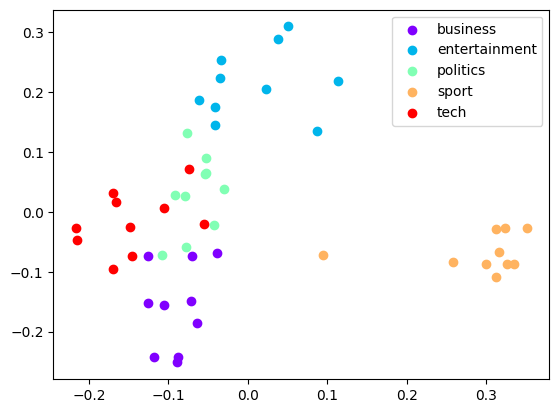

In [35]:
import matplotlib.pyplot as plt
df[['x', 'y']] = pd.DataFrame(df['vis_dims_pca'].to_list(), index=df.index)

# Create a scatter plot with colors determined by 'category'
categories = df['category'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    df_category = df[df['category'] == category]
    plt.scatter(df_category['x'], df_category['y'], color=colors[i], label=category)

plt.legend()
plt.show()

### Though experiment - What does this visualization represents?

1. News in the same category are in general semantically close to each other.

2. Entertainment and sports are much isolated semantic groups while some of tech, business and politics have intersection which also make senses. Like big tech companies did play major role in politics.


# Classify news

Now, let's ignore the 'category' column and only use the 'content' column to train a classifier. The goal is to see if the classifier can predict the 'category' column based on the 'content' column.

By training this model, we demonstrate how embedding can be use for slightly different purposes rather than semantic retrieval.

Now we load and prepare the data:

In [37]:
# First, we need to split the data for training and testing purposes
from sklearn.model_selection import train_test_split

# Now, we load full dataset
df = pd.read_csv("./data/bbc/bbc-news-data-embedding_full.csv", sep='\t') 
# convert embedding column to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)


Next, we train the model

In [43]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = ______________(df['embedding'], df['category'], test_size=0.2, random_state=42)

# # train KNN model
# from sklearn.neighbors import KNeighborsClassifier
# knn = __________________(n_neighbors=5)
# knn.__________(X_train.to_list(), y_train.to_list())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['embedding'], df['category'], test_size=0.2, random_state=42)

# train KNN model
from sklearn.neighbors import KNeighborsClassifier
# initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
# train the model using the training data.
knn.fit(X_train.to_list(), y_train.to_list())

KNeighborsClassifier()

Now we will use this model to predict the test data

In [44]:
# # predict
# y_pred = knn.______________(X_test.to_list())

# predict
y_pred = knn.predict(X_test.to_list())

Time to see how accurate our model is

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   0   5   0   2]
 [  2  68   0   0   2]
 [  0   0  75   0   1]
 [  1   0   0 101   0]
 [  1   2   2   0  75]]
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       115
entertainment       0.97      0.94      0.96        72
     politics       0.91      0.99      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.94      0.94      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



***
#### Homework question #1: In this model, how many business news has been falsely identified as tech news?

Answer: 2

Let's say: a = business, b = entertainment, c = politics, d = sport, e = tech

In follwoing confusion matrix,

       a   b   c   d   e

a  [[108   0   5   0   2]

b   [  2  68   0   0   2]

c   [  0   0  75   0   1]

d   [  1   0   0 101   0]

e   [  1   2   2   0  75]]

row 'a' (business news) is identified as column 'e' (tech new) is 2.


***
#### Homework question #2: Explain what does 0.96 precision mean for business class?

Answer: the KNN model predicts a news to be 'business', there is a 96% chance that the news truly belongs to the 'business' category.

Precision definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives.

Formula: Precision = True Positives / (True Positives + False Positives) = 108 / (108 + 2 + 0 + 1 + 1 ) = 0.9643
​

***
#### Homework question #3: Explain what does 0.94 recall mean for tech?

Answer: it means that out of all actual news that belong to the 'tech' category, the KNN model correctly identified and predicted 94% of them.

Recall definition: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.

Formula: Recall = True Positives / (True Positives + False Negatives) = 75 / (75 + 1 + 2 + 2) = 0.9375
​

***
#### Homework question #4: Find a case where we need to recall as metric to measure model performance?

Answer: legal case information retrieval. 

For example, a lawyer is using a KNN model to retrieving relevant legal cases and precedents related to a particular client's case.
Importance of Recall: In this scenario, the lawyer wants to ensure that the model doesn't miss any relevant legal cases that could be crucial for building a strong case for the client. Missing important relevant legal information could result in an incomplete understanding of the case.
